Classification problem - Titanic dataset

In [1]:
from google.colab import files      #uploading file titanic.csv
uploaded=files.upload()

Saving titanic.csv to titanic.csv


In [2]:
import pandas as pd               #importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df=pd.read_csv('titanic.csv')       #reading file
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape      #shape of the dataset

(891, 12)

In [5]:
df.info()  #information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().any() #to check whether there is any null value in the dataset

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
df.isnull().sum()  #to find the sum of the null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df["Survived"].value_counts()  #count the values in the column

0    549
1    342
Name: Survived, dtype: int64

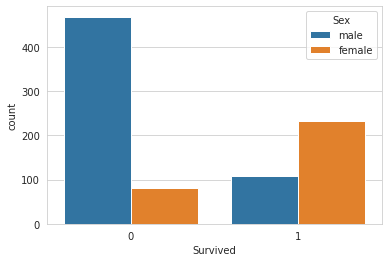

In [9]:
sb.set_style("whitegrid")             #ploting survived column using countplot
sb.countplot(x="Survived",hue="Sex",data=df)

AxesSubplot(0.125,0.125;0.62x0.755)


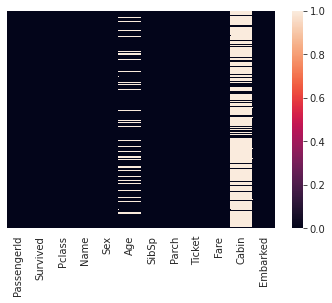

In [10]:
print(sb.heatmap(df.isnull(),yticklabels=False))      #ploting heatmap

In [11]:
age_mean=df["Age"].mean()       #calculating mean of column age
age_mean

29.69911764705882

In [12]:
df["Age"]=df["Age"].fillna(age_mean)    #filling null values in age column using its mean
df["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [13]:
df["Age"].isnull().any()

False

In [14]:
df=df.drop(["Name","PassengerId","Ticket","Cabin"],axis=1)  #dropping unwanted columns
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [15]:
df["Embarked"]=df["Embarked"].fillna("C")   #filling null values in embarked column using variable 'C'
df["Embarked"].isnull().any()

False

In [16]:
from sklearn import preprocessing       #performing label encoding to convert categorical data into numeric data
le=preprocessing.LabelEncoder()
df["Embarked"]=le.fit_transform(df["Embarked"])
df["Embarked"].unique()

array([2, 0, 1])

In [17]:
from sklearn import preprocessing   #performing one hot encoding to convert categorical data into numeric data
df=pd.get_dummies(df,columns=['Sex'])
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.000000,1,0,7.2500,2,0,1
1,1,1,38.000000,1,0,71.2833,0,1,0
2,1,3,26.000000,0,0,7.9250,2,1,0
3,1,1,35.000000,1,0,53.1000,2,1,0
4,0,3,35.000000,0,0,8.0500,2,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,2,0,1
887,1,1,19.000000,0,0,30.0000,2,1,0
888,0,3,29.699118,1,2,23.4500,2,1,0
889,1,1,26.000000,0,0,30.0000,0,0,1


In [18]:
from sklearn.model_selection import train_test_split    #splitting train data amd test data
x=df[['Pclass','Age','Sex_female','Sex_male']]
y=df['Survived']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3)

In [19]:
X_train.shape

(623, 4)

In [20]:
Y_train.shape

(623,)

In [21]:
X_test.shape

(268, 4)

In [22]:
Y_test.shape

(268,)

These 8 classifications models has performed in the titanic dataset and then find its accuracy and also confusion matrix.

In [23]:
from sklearn.neighbors import KNeighborsClassifier 
m=KNeighborsClassifier()
m.fit(X_train,Y_train)
p=m.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,p)


0.7388059701492538

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,p)
cm

array([[136,  33],
       [ 37,  62]])

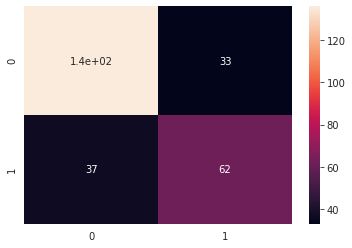

In [25]:
sb.heatmap(cm,annot=True)

In [26]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
accuracy_score(Y_test,predictions)

0.7425373134328358

In [27]:
from xgboost import XGBClassifier
M=XGBClassifier()
M.fit(X_train,Y_train)
P=M.predict(X_test)
accuracy_score(Y_test,P)

0.7574626865671642

In [28]:
from sklearn.naive_bayes import MultinomialNB
a=MultinomialNB()
a.fit(X_train,Y_train)
b=a.predict(X_test)
accuracy_score(Y_test,b)

0.7425373134328358

In [29]:
from sklearn.ensemble import RandomForestClassifier
u=RandomForestClassifier()
u.fit(X_train,Y_train)
v=u.predict(X_test)
accuracy_score(Y_test,v)

0.7574626865671642

In [30]:
from sklearn.tree import DecisionTreeClassifier
s=DecisionTreeClassifier()
s.fit(X_train,Y_train)
t=s.predict(X_test)
accuracy_score(Y_test,t)

0.75

In [31]:
from sklearn.linear_model import LogisticRegression
c=LogisticRegression()
c.fit(X_train,Y_train)
d=c.predict(X_test)
accuracy_score(Y_test,d)

0.753731343283582

In [32]:
from sklearn.svm import SVC
mo=SVC()
mo.fit(X_train,Y_train)
pr=mo.predict(X_test)
accuracy_score(Y_test,pr)

0.6305970149253731